In [ ]:
import numpy as num
from PIL import Image
import nibabel as nib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from math import log10, sqrt

In [ ]:
image = nib.load('Test.nii')

In [ ]:
def PSNR(original, compressed):
    mse = num.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [ ]:
a = num.array(image.dataobj)
print(a.shape)

# a single 2D slice of the original
data = a[:, :, 80]

pca = PCA(n_components=70)
pca.fit(data)

transform = pca.transform(data)
final_transform = pca.inverse_transform(transform)

(240, 240, 155)


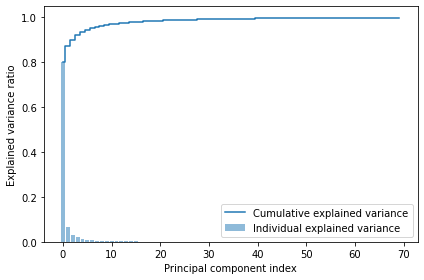

In [ ]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = num.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
cum_sum_eigenvalues

array([0.80309252, 0.87049056, 0.90019833, 0.92174982, 0.93447534,
       0.94471964, 0.95354659, 0.95860581, 0.9629068 , 0.96647057,
       0.96962987, 0.97218518, 0.97439772, 0.97645534, 0.97814992,
       0.97966679, 0.98096103, 0.98220848, 0.98339409, 0.98443424,
       0.98542042, 0.98632813, 0.98714449, 0.98791289, 0.98861775,
       0.9892413 , 0.98982518, 0.99031782, 0.99080426, 0.99125241,
       0.99169376, 0.99210535, 0.99250576, 0.9928828 , 0.99322093,
       0.99355031, 0.99385738, 0.99415829, 0.99444458, 0.99470103,
       0.99495396, 0.99519253, 0.99541401, 0.99563288, 0.9958356 ,
       0.99602665, 0.99621289, 0.99638997, 0.99656384, 0.9967325 ,
       0.99688935, 0.99704004, 0.99718044, 0.99731799, 0.99744119,
       0.99756273, 0.99767945, 0.99778928, 0.99789777, 0.99799905,
       0.99809856, 0.99819331, 0.99828478, 0.99837131, 0.99845603,
       0.9985355 , 0.99861261, 0.99868557, 0.99875543, 0.99882379])

In [ ]:
PSNR(data, final_transform)

39.030137107520865

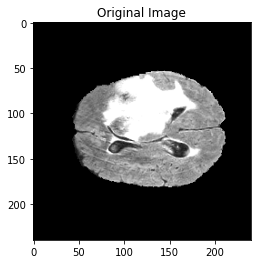

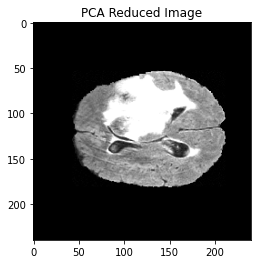

In [ ]:
# displaying the original image

pil_image1 = Image.fromarray(data)
plt.imshow(pil_image1, cmap='gray')
plt.title('Original Image')
plt.show()

pil_pcaImage = Image.fromarray(final_transform)
plt.imshow(pil_pcaImage, cmap='gray')
plt.title('PCA Reduced Image')
plt.show()

https://www.youtube.com/watch?v=TJdH6rPA-TI

Best video on PCA